In [1]:
import pandas as pd

In [2]:
bike = pd.read_csv("../data/bike_sharing/hour.csv").drop(["instant", "dteday", "casual", "registered"], axis = 1)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
bike = pd.get_dummies(data = bike, columns = ["season", "yr", "mnth", "hr", "weathersit"])
bike.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,6,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,6,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,6,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,6,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,6,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
bike = bike.sample(frac = 1).reset_index(drop = True)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       17379 non-null  int64  
 1   weekday       17379 non-null  int64  
 2   workingday    17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   hum           17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   cnt           17379 non-null  int64  
 8   season_1      17379 non-null  uint8  
 9   season_2      17379 non-null  uint8  
 10  season_3      17379 non-null  uint8  
 11  season_4      17379 non-null  uint8  
 12  yr_0          17379 non-null  uint8  
 13  yr_1          17379 non-null  uint8  
 14  mnth_1        17379 non-null  uint8  
 15  mnth_2        17379 non-null  uint8  
 16  mnth_3        17379 non-null  uint8  
 17  mnth_4        17379 non-null  uint8  
 18  mnth_5        17379 non-nu

In [6]:
X = bike.drop("cnt", axis = 1)
y = bike["cnt"]

In [7]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["temp", "atemp", "hum", "windspeed"]
scaler = StandardScaler()
scales = scaler.fit_transform(X[scale_cols])

In [8]:
X["temp"] = scales[:, 0]
X["atemp"] = scales[:, 1]
X["hum"] = scales[:, 2]
X["windspeed"] = scales[:, 3]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
import numpy as np
np.array(y_test).shape

(2607,)

In [12]:
mean_squared_error(y_test, np.ones(shape = (2607,))*np.mean(y_test))

31029.31530038701

https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network wegen den NAs beim normalen SGD.

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()
model.add(Dense(64, "relu", input_shape = (X_train.shape[1],)))
model.add(Dense(32, "relu"))
model.add(Dense(32, "relu"))
model.add(Dense(16, "relu"))
model.add(Dense(1))

model.compile("adam", "mean_squared_error", metrics = ["mse"])

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 32)

Epoch 1/5
462/462 [==============================] - 2s 4ms/step - loss: 26518.6660 - mse: 26518.6660 - val_loss: 9498.3408 - val_mse: 9498.3408
Epoch 2/5
462/462 [==============================] - 2s 4ms/step - loss: 8202.5947 - mse: 8202.5947 - val_loss: 7545.3125 - val_mse: 7545.3125
Epoch 3/5
462/462 [==============================] - 1s 3ms/step - loss: 5813.5239 - mse: 5813.5239 - val_loss: 4023.4780 - val_mse: 4023.4780
Epoch 4/5
462/462 [==============================] - 1s 2ms/step - loss: 3073.1448 - mse: 3073.1448 - val_loss: 2804.5029 - val_mse: 2804.5029
Epoch 5/5
462/462 [==============================] - 1s 3ms/step - loss: 2419.5396 - mse: 2419.5396 - val_loss: 2364.9600 - val_mse: 2364.9600


In [14]:
model.history.history

{'loss': [26518.666015625,
  8202.5947265625,
  5813.52392578125,
  3073.144775390625,
  2419.53955078125],
 'mse': [26518.666015625,
  8202.5947265625,
  5813.52392578125,
  3073.144775390625,
  2419.53955078125],
 'val_loss': [9498.3408203125,
  7545.3125,
  4023.47802734375,
  2804.5029296875,
  2364.9599609375],
 'val_mse': [9498.3408203125,
  7545.3125,
  4023.47802734375,
  2804.5029296875,
  2364.9599609375]}

In [15]:
model.evaluate(X_test, y_test)

82/82 [==============================] - 0s 2ms/step - loss: 2364.9600 - mse: 2364.9600


[2364.9599609375, 2364.9599609375]

In [16]:
y_test

10466    569
2547       9
7298     179
14478    371
975      317
        ... 
4316      15
16483    183
13499    267
1090     426
14336      5
Name: cnt, Length: 2607, dtype: int64

In [17]:
model.predict(X_test)

array([[492.0485   ],
       [  9.099712 ],
       [161.74535  ],
       ...,
       [254.34612  ],
       [393.3382   ],
       [ -0.6463869]], dtype=float32)

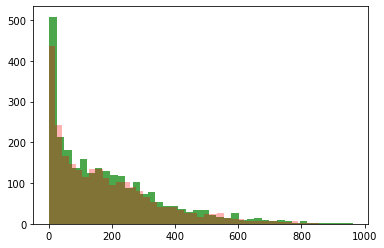

In [18]:
import matplotlib.pyplot as plt

plt.hist(y_test, alpha = 0.7, color = "green", bins = 40)
plt.hist(model.predict(X_test), alpha = 0.3, color = "red", bins = 40)
plt.show()

[]

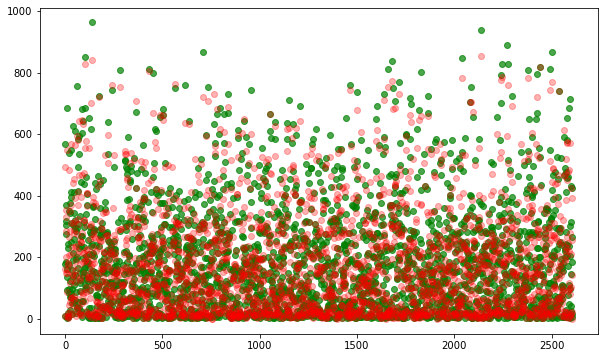

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color = "green", alpha = 0.7)
plt.scatter(range(len(y_test)), model.predict(X_test), color = "red", alpha = 0.3)
plt.plot()